# Dataset Import and Basic Dataset Information

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./data/marketing_sample_for_trulia_com-real_estate__20190901_20191031__30k_data.csv")

In [3]:
data.shape

(30002, 30)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30002 entries, 0 to 30001
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           30002 non-null  object 
 1   Job Description     30002 non-null  object 
 2   Job Type            0 non-null      float64
 3   Categories          0 non-null      float64
 4   Location            30002 non-null  object 
 5   City                30002 non-null  object 
 6   State               30002 non-null  object 
 7   Country             30002 non-null  object 
 8   Zip Code            16252 non-null  object 
 9   Address             0 non-null      float64
 10  Salary From         0 non-null      float64
 11  Salary To           0 non-null      float64
 12  Salary Period       0 non-null      float64
 13  Apply Url           18392 non-null  object 
 14  Apply Email         0 non-null      float64
 15  Employees           0 non-null      float64
 16  Indu

In [5]:
data = data[['Job Title','Job Description','City','State','Country','Company Name']]

In [6]:
data.describe(include = "object")

,Job Title,Job Description,City,State,Country,Company Name
count,30002,30002,30002,30002,30002,30000
unique,18077,24714,3472,81,1,12740
top,Account Executive,"<div id=""jobDescriptionText"" class=""jobsearch-...",New York,CA,United States,Lids
freq,329,209,1260,4495,30002,425


In [8]:
data.head()

,Job Title,Job Description,City,State,Country,Company Name
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",Mission Hills,CA,United States,Del Taco LLC
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",Atlanta,GA,United States,FOCUS Brands
2,Senior Product Manager - Data,"<div id=""jobDescriptionText"" class=""jobsearch-...",Chicago,IL,United States,Vibes
3,Part-Time Office Concierge,"<div id=""jobDescriptionText"" class=""jobsearch-...",Festus,MO,United States,Coldwell Banker Real Estate LLC
4,Print & Marketing Associate,"<div id=""jobDescriptionText"" class=""jobsearch-...",Cedar Rapids,IA,United States,Staples Stores


In [9]:
## To view any Job description completly
text_document = data.loc[5, 'Job Description']
print(text_document)

<div id="jobDescriptionText" class="jobsearch-jobDescriptionText">
<div>
<div>
<div>As a Cyber Risk Senior Consultant for Deloitte's Financial Risk Services, you’ll work with our diverse teams of leading professionals to help design and implement solutions to some of today’s toughest cybersecurity challenges so they can achieve business growth and manage risk. You’ll build on your foundations in Information Technology and Business to design and implement business-aligned cyber risk management programs, processes, and systems that help clients focus their investments on key information technology risks.<br>
</div>
<div></div>
<div>In your role as a Senior Consultant, you will support a team in delivering projects across a variety of cyber topics, including such examples as:
</div>
<ul>
<li>Understand how business functions operate and how industry trends impact a client’s business</li>
<li>Assessing or developing an organization’s cyber risk strategy and posture, as it relates to data r

# Function Declaration

In [10]:
from bs4 import BeautifulSoup

In [11]:
## Code to pull data under all the HTML tags
'''
def clean_html(html_content):
    """Clean HTML content using BeautifulSoup"""
    soup = BeautifulSoup(html_content, 'html.parser')
    # Remove any script and style tags
    for script in soup(["script", "style"]):
        script.extract()
    # Get text content
    cleaned_text = soup.get_text(separator=' ')
    return cleaned_text
'''

'\ndef clean_html(html_content):\n    """Clean HTML content using BeautifulSoup"""\n    soup = BeautifulSoup(html_content, \'html.parser\')\n    # Remove any script and style tags\n    for script in soup(["script", "style"]):\n        script.extract()\n    # Get text content\n    cleaned_text = soup.get_text(separator=\' \')\n    return cleaned_text\n'

In [12]:
## Most of the useful content is under li tags, so only pulling li tags
def clean_html(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    li_texts = [li.get_text(strip=True) for li in soup.find_all('li')]
    return '. '.join(li_texts)

In [12]:
#pd.set_option('display.max_rows', None)

In [13]:
import re

In [16]:
## Remove Stop Words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diegosabajo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# We do not want to remove "d","s" etc from words
stop = set(word for word in stop if len(word) > 1)

In [18]:
# Additional stopwords
extra_list = ["let", "may", "might", "must", "need", "you'll","you’ll"]
stop = stopwords.words("english")
stop.extend(extra_list)

In [19]:
## Function to remove Stop Words
def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [20]:
## Function to Tokenize, lemmatize, and perform POS tagging
#import pandas as pd
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
#import nltk

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

# Function to map NLTK's (Natural Language Toolikt) POS tags to the format that the wordnet lemmatizer can understand
# Though wordnet lemmatizer is part of NLTK, but uses different POS tags
def get_wordnet_pos(nltk_pos_tag):
    if nltk_pos_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_pos_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Function to tokenize, perform POS tagging and lemmatize
def process_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    
    lemmatized_and_tagged = []
    for token, tag in tagged_tokens:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag is None:
            lemma = token
        else:
            lemma = lemmatizer.lemmatize(token, wn_tag)
        lemmatized_and_tagged.append((lemma, tag))
    
    return lemmatized_and_tagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/diegosabajo/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/diegosabajo/nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/diegosabajo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/diegosabajo/nltk_data...


In [21]:
'''
## For Normalization
##from nltk.stem import WordNetLemmatizer ## For Normalization
##from nltk.tokenize import word_tokenize ## For Tokenization

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])
    return lemmatized_text
'''

"\n## For Normalization\n##from nltk.stem import WordNetLemmatizer ## For Normalization\n##from nltk.tokenize import word_tokenize ## For Tokenization\n\ndef lemmatize_text(text):\n    lemmatizer = WordNetLemmatizer()\n    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])\n    return lemmatized_text\n"

In [21]:
## For POS
#from nltk import pos_tag ## For POS

In [22]:
#nltk.download('punkt') # This is for Tokenization
#nltk.download('averaged_perceptron_tagger') # This is for POS

In [24]:
def clean_job_description(description):

    # To clean HTML format and only pull line items
    description = description.apply(clean_html)
     
    # Remove Stopwprds
    description = description.apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
    
    # Convert to lowercase
    description = description.str.lower()
    
    # Call rem_en function to remove Stopwords
    description = description.apply(rem_en)
    
    # Remove "'s" or "’s" at the end of words
    description = description.str.replace(r"'s\b|’s\b", "", regex=True)
    
    # Remove non-alphabetic characters
    description = description.str.replace(r'[^a-zA-Z\s]', ' ', regex=True)
    
    # Remove single characters
    description = description.str.replace(r'\b\w\b', '', regex=True)
    
    # Remove extra whitespaces
    description = description.str.replace(r'\s+', ' ', regex=True).str.strip()

    # Normalization using Lemmatization, Tokenization & POS
    description = description.apply(process_text)
    
    return description

In [25]:
data['Job Description POS'] = clean_job_description(data['Job Description'])

KeyboardInterrupt: 

In [ ]:
data.loc[1,'Job Description POS']

[('program', 'NN'),
 ('procedure', 'NN'),
 ('execution', 'NN'),
 ('material', 'NN'),
 ('development', 'NN'),
 ('use', 'NN'),
 ('strategic', 'JJ'),
 ('thinking', 'NN'),
 ('identify', 'VB'),
 ('area', 'NNS'),
 ('improvement', 'NN'),
 ('within', 'IN'),
 ('restaurant', 'NN'),
 ('system', 'NNS'),
 ('use', 'VBD'),
 ('home', 'NN'),
 ('office', 'NN'),
 ('restaurant', 'NN'),
 ('operation', 'NNS'),
 ('develop', 'VBP'),
 ('test', 'NN'),
 ('train', 'NN'),
 ('integrate', 'NN'),
 ('introduce', 'VB'),
 ('execute', 'JJ'),
 ('new', 'JJ'),
 ('efficient', 'JJ'),
 ('program', 'NNS'),
 ('procedure', 'NNS'),
 ('follow', 'VBG'),
 ('area', 'NNS'),
 ('include', 'VBG'),
 ('limit', 'VBD'),
 ('to', 'TO'),
 ('information', 'NN'),
 ('technology', 'NN'),
 ('innovation', 'NN'),
 ('project', 'NNS'),
 ('initiativessubject', 'VBP'),
 ('matter', 'JJ'),
 ('expertise', 'NN'),
 ('day', 'NN'),
 ('day', 'NN'),
 ('system', 'NN'),
 ('administrationliaison', 'JJ'),
 ('jamba', 'NN'),
 ('business', 'NN'),
 ('team', 'NNS'),
 ('itre

# Data Science Analysis

In [22]:
String =  'Data Scientist|Data Science|Business Intelligence'

In [23]:
filtered_data = data.loc[data['Job Title'].str.contains(String, case=False, na=False), 'Job Description POS']

KeyError: 'Job Description POS'

In [28]:
Data_Science_POS = filtered_data.apply(pd.Series).stack().tolist()
#Data_Science_POS

In [29]:
## Filter Out Nouns
filtered_pos = [ ]
for one in Data_Science_POS:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)
#print(len(filtered_pos))

In [30]:
## Finding most frequent words
fdist_pos = nltk.FreqDist(filtered_pos)
top_10_words = fdist_pos.most_common(10)
#print(top_10_words)

In [32]:
new_tuples = [(inner_tuple[0], count) for inner_tuple, count in top_10_words]
print(new_tuples)

[('data', 827), ('business', 474), ('experience', 431), ('year', 180), ('skill', 180), ('analytics', 170), ('ability', 164), ('management', 163), ('science', 157), ('analysis', 143)]


In [40]:
first_elements = [inner_tuple[0] for inner_tuple, count in top_10_words]
print(first_elements)

['data', 'business', 'experience', 'year', 'skill', 'analytics', 'ability', 'management', 'science', 'analysis']


# Word Cloud for Data Science

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [34]:
from nltk.collocations import *

In [35]:
wordcloud = WordCloud(width = 1500, height = 1000,background_color='white')

In [36]:
word_frequencies = dict(new_tuples)

In [37]:
wordcloud.generate_from_frequencies(word_frequencies)

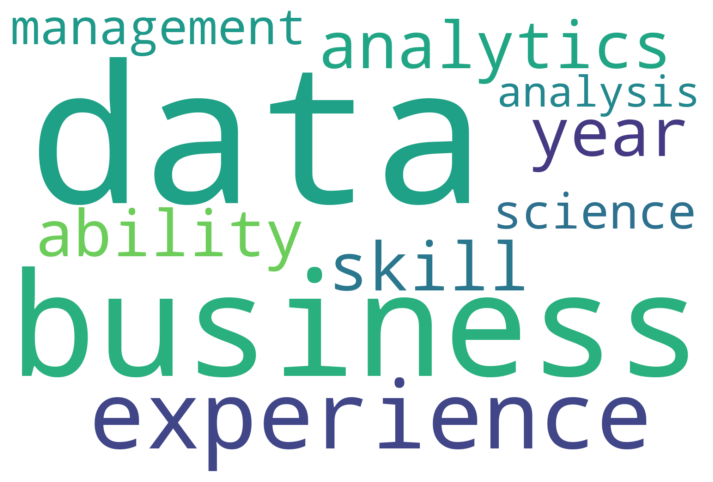

In [38]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()